Last week we learend that in safeGraph data, the metric about median distance traveled from home is unreliable with many outliers. In this notebook we want to explore whether other metrics are reliable, such as median_home_dwell_time, full_time_work_behavior_devices, and part_time_work_devices.

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('social_dist_all_trimmed_new.csv', nrows = 5)

In [4]:
data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,origin_census_block_group,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home
0,0,2019-01-01T00:00:00-06:00,2019-01-02T00:00:00-06:00,1,AL,Colbert County,1033,10330210004,179,78,28,7,1,1,714,52,92,687
1,1,2019-01-01T00:00:00-06:00,2019-01-02T00:00:00-06:00,1,AL,Jefferson County,1073,10730049022,1312,259,93,13,2,1,58,44,53,5381
2,2,2019-01-01T00:00:00-06:00,2019-01-02T00:00:00-06:00,1,AL,Talladega County,1121,11210118001,299,91,45,3,1,1,487,0,100,1591
3,3,2019-01-01T00:00:00-06:00,2019-01-02T00:00:00-06:00,1,AL,Tuscaloosa County,1125,11250106021,1059,392,171,26,8,1,860,20,97,4623
4,4,2019-01-01T00:00:00-09:00,2019-01-02T00:00:00-09:00,2,AK,Northwest Arctic Borough,2188,21880002003,36,10,3,1,1,1,1197,10,99,0


Now we want to get all the data about king_county, and plot the time series of various variables within one census group against time, see if that plot makes sense.

In [5]:
# read the head.
king_county_data = pd.read_csv("social_dist_all_trimmed_new.csv", nrows= 0)

In [6]:
counter = 0
for chunk in pd.read_csv("social_dist_all_trimmed_new.csv", chunksize = 1000000):
    chunk['county_code'] = pd.to_numeric(chunk['county_code'], errors='coerce')
    # drop any rows with NaN values, (remember there are a lot of headers within the csv file)
    chunk.dropna(subset = ['county_code'], inplace = True)
    # only select king county data.
    chunk = chunk[chunk['county_code'] == 53033]

    # add this chunk of king county data to all the king county data.
    king_county_data = king_county_data.append(chunk, ignore_index = True)

    counter += 1
    print(counter) # track progress
    print(king_county_data.shape[0]) # how large is our data right now

C:\Users\wenju\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


1
6452
2
12960
3
19431
4
25905
5
32347
6
38845
7
45311
8
51796
9
58271
10
64727
11
71231
12
77677
13
84164
14
90629
15
97107
16
103589
17
110047
18
116540
19
122994
20
129505
21
135954
22
142449
23
148919
24
155372
25
161838
26
168326
27
174802
28
181290
29
187766
30
194254
31
200736
32
207195
33
213652
34
220135
35
226602
36
233102
37
239574
38
246058
39
252533
40
259013
41
265466
42
271957
43
278417
44
284897
45
291396
46
297869
47
304344
48
310809
49
317297
50
323760
51
330226
52
336687
53
343169
54
349666
55
356124
56
362626
57
369093
58
375560
59
382025
60
388493
61
394972
62
401449
63
407977
64
414464
65
420950
66
427428
67
433912
68
440434
69
446911
70
453451
71
459932
72
466448
73
472939
74
479424
75
485920
76
492399
77
498910
78
505387
79
511890
80
518346
81
524828
82
531322
83
537774
84
544284
85
550734
86
557255
87
563729
88
570203
89
576684
90
583148
91
589648
92
596110
93
602611
94
609059
95
615561
96
622029
97
628507
98
635004
99
641462
100
647950
101
654405
102
660919
10

In [7]:
# convert numeric columns to take numeric values.
king_county_data['origin_census_block_group'] = pd.to_numeric(king_county_data['origin_census_block_group'], errors='coerce')
king_county_data['part_time_work_behavior_devices'] = pd.to_numeric(king_county_data['part_time_work_behavior_devices'], errors='coerce')
king_county_data['full_time_work_behavior_devices'] = pd.to_numeric(king_county_data['full_time_work_behavior_devices'], errors='coerce')
king_county_data['median_home_dwell_time'] = pd.to_numeric(king_county_data['median_home_dwell_time'], errors='coerce')

In [10]:
# drop any rows with string when we need numerical values.
king_county_data.dropna(inplace = True)

In [11]:
king_county_data[king_county_data['origin_census_block_group'] == 530330080021]

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,origin_census_block_group,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home
0,233.0,2019-01-01T00:00:00-08:00,2019-01-02T00:00:00-08:00,53,WA,King County,53033.0,530330080021,296,91,42,1,1,1,431,5,98,1026
1421,233.0,2019-01-02T00:00:00-08:00,2019-01-03T00:00:00-08:00,53,WA,King County,53033.0,530330080021,296,96,46,6,4,1,409,6,99,1223
2843,233.0,2019-01-03T00:00:00-08:00,2019-01-04T00:00:00-08:00,53,WA,King County,53033.0,530330080021,296,107,50,7,2,1,412,10,97,306
4265,233.0,2019-01-04T00:00:00-08:00,2019-01-05T00:00:00-08:00,53,WA,King County,53033.0,530330080021,296,105,39,9,4,3,384,27,86,620
5687,233.0,2019-01-05T00:00:00-08:00,2019-01-06T00:00:00-08:00,53,WA,King County,53033.0,530330080021,296,100,45,1,1,1,469,5,99,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825647,964.0,2020-08-04T00:00:00-07:00,2020-08-05T00:00:00-07:00,53,WA,King County,53033.0,530330080021,110,51,21,1,1,2,507,17,98,484
827065,725.0,2020-08-05T00:00:00-07:00,2020-08-06T00:00:00-07:00,53,WA,King County,53033.0,530330080021,108,57,25,1,1,1,501,16,99,183
828484,484.0,2020-08-06T00:00:00-07:00,2020-08-07T00:00:00-07:00,53,WA,King County,53033.0,530330080021,106,51,28,2,1,1,853,0,100,5883
829906,725.0,2020-08-07T00:00:00-07:00,2020-08-08T00:00:00-07:00,53,WA,King County,53033.0,530330080021,106,45,17,3,1,3,652,55,93,263


In [12]:
# convert string in date_range_start column to date object
from datetime import datetime
king_county_data['date_range_start'] = king_county_data['date_range_start'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

In [14]:
king_county_data.to_csv('king_county_data_with_census_groups.csv', index = False)

In [13]:
import matplotlib.pyplot as plt

In [20]:
# write a function that can plot the time series of 
# a variable vs date given a census_block number
# in king_county.
def plotTimeSeriesOfGroup(census_group_num, variable):
    plt.figure(figsize = (10, 10))
    thisGroupData = king_county_data[king_county_data['origin_census_block_group'] == census_group_num]
    plt.plot(thisGroupData['date_range_start'], thisGroupData[variable])
    plt.ylabel(f'{variable} per day')
    plt.xlabel('date')
    plt.title(f'time series of {variable} by {census_group_num}')

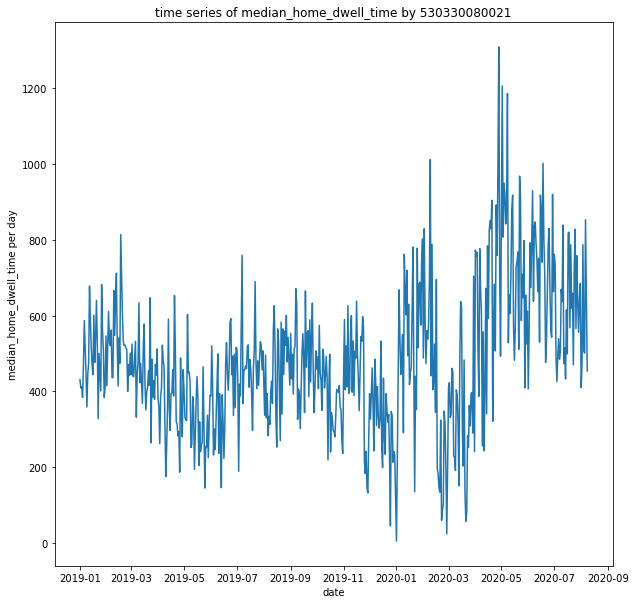

In [21]:
plotTimeSeriesOfGroup(530330080021, 'median_home_dwell_time')

In [18]:
census_group_num_array = king_county_data['origin_census_block_group'].unique()

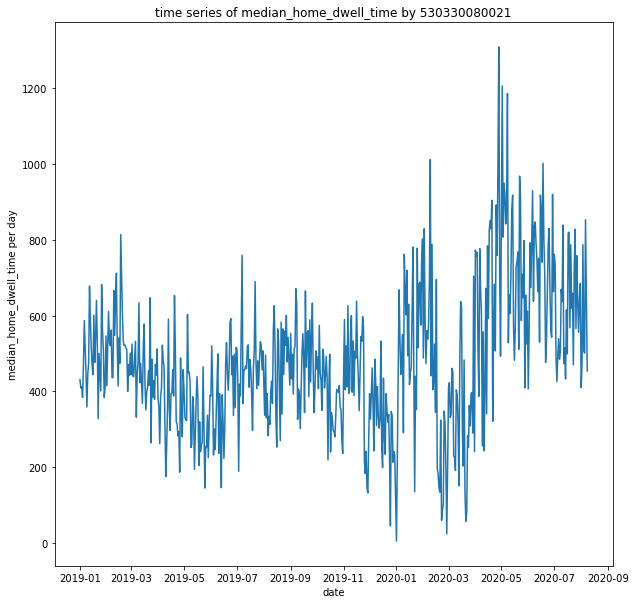

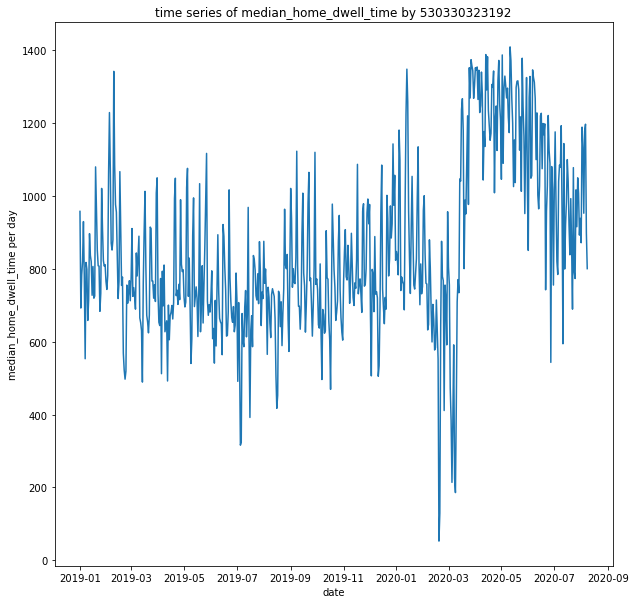

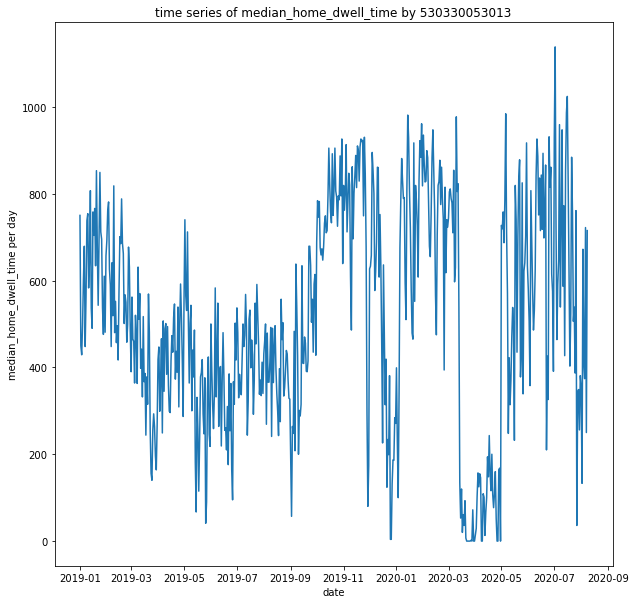

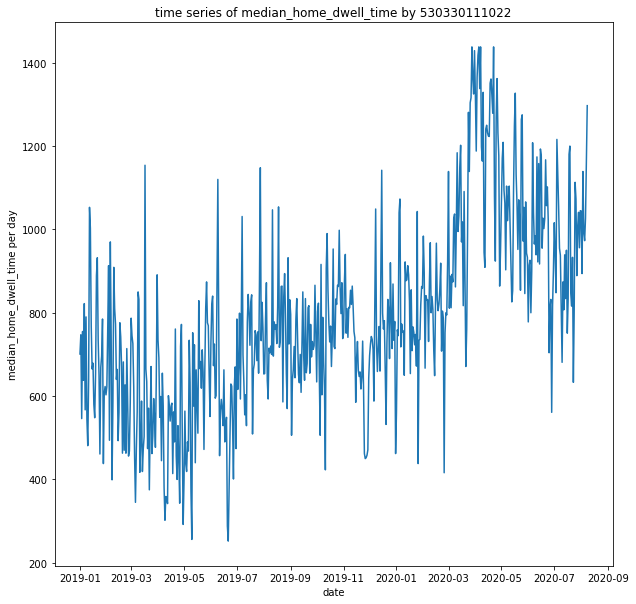

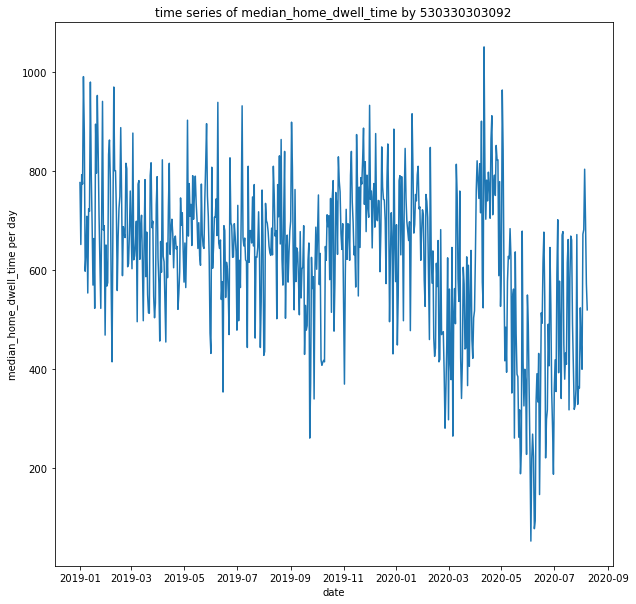

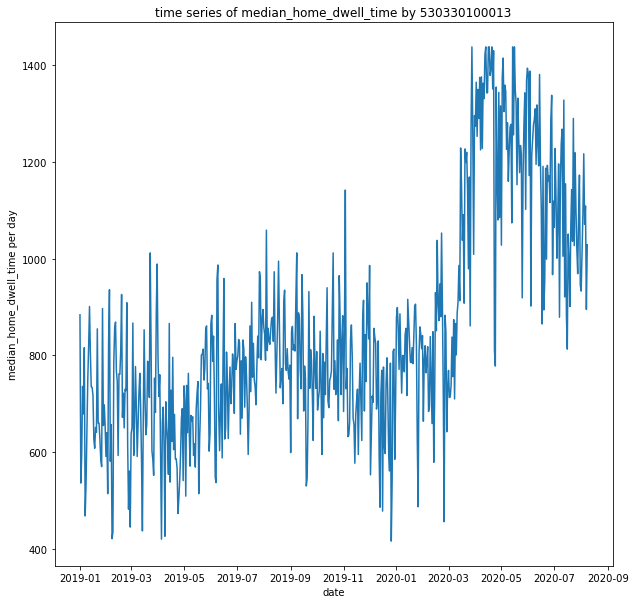

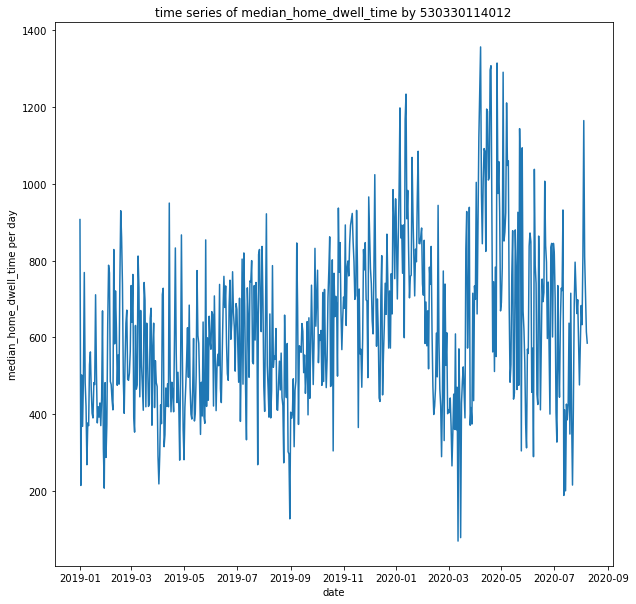

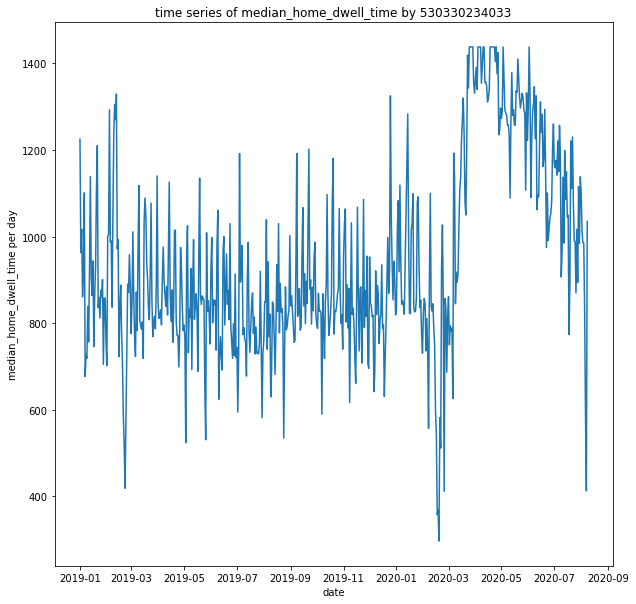

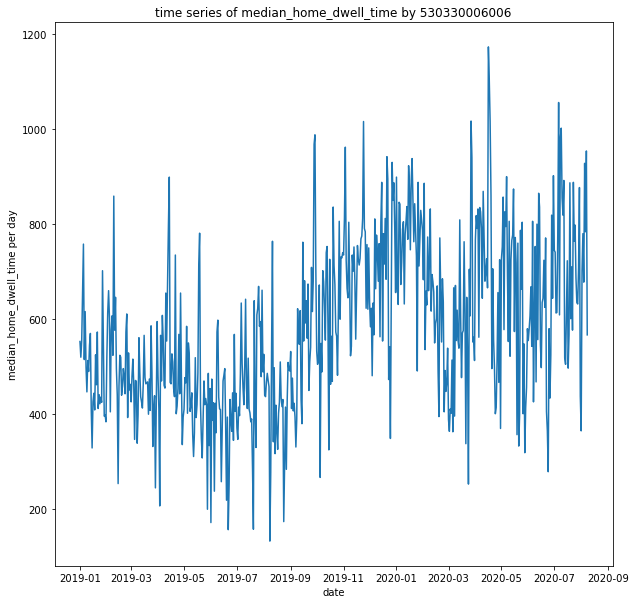

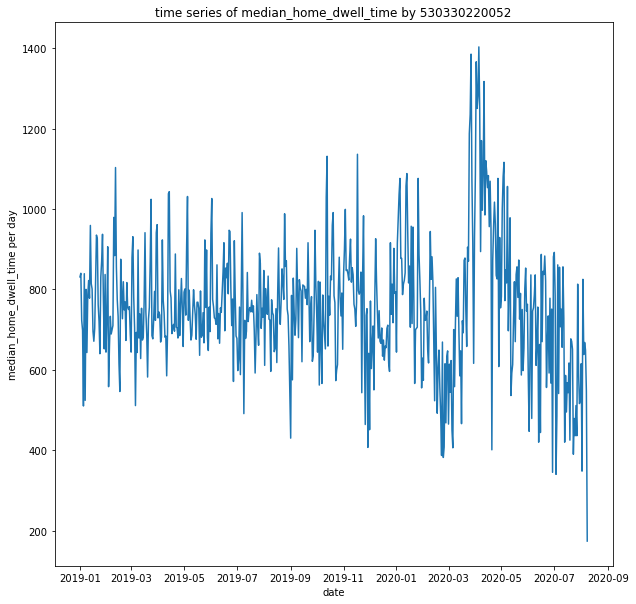

In [22]:
# plot data for 10 census groups.
for i in range(10):
    plotTimeSeriesOfGroup(census_group_num_array[i], 'median_home_dwell_time')

We can see in the above 10 plots that median_home_dwell_time does increase in some census_groups during covid. This variable doesn't seem to have terrible outliers like distance_traveled. Maybe we can do analysis on this.

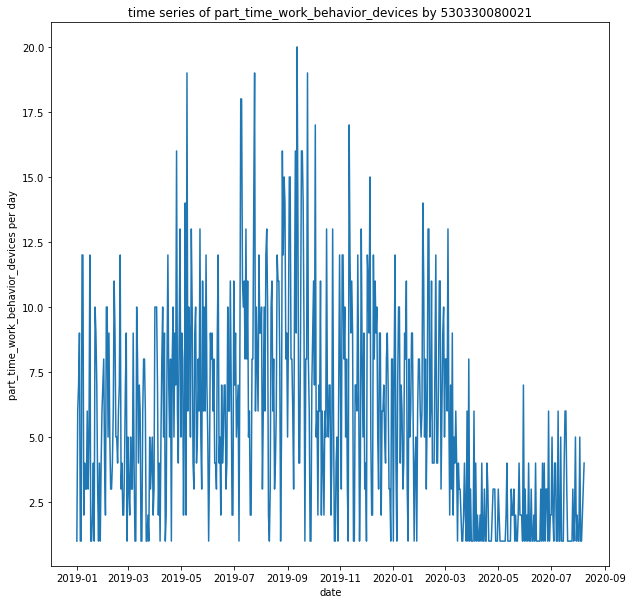

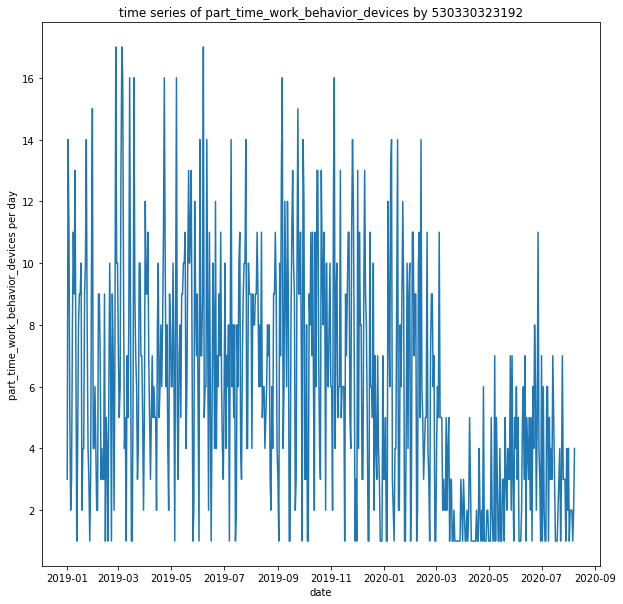

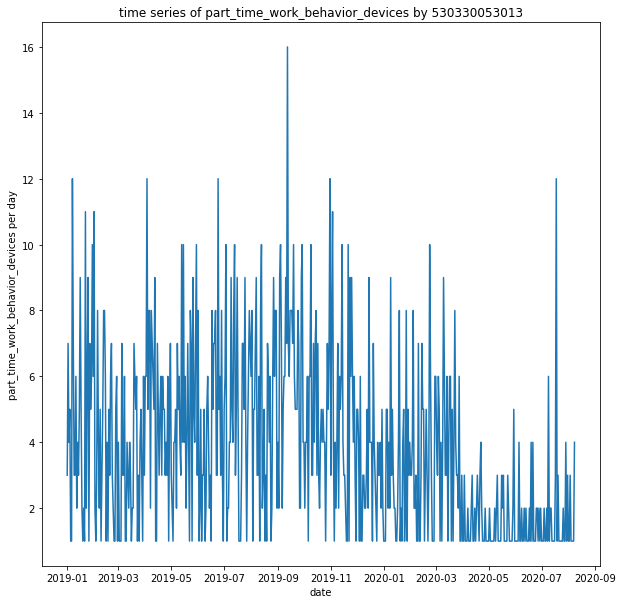

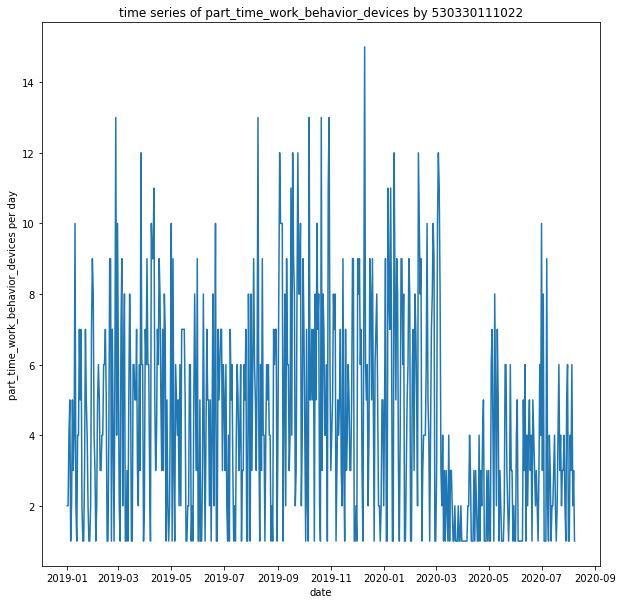

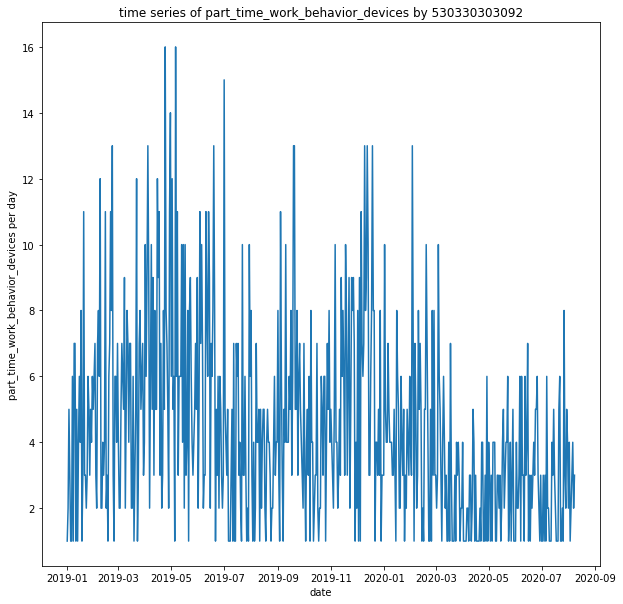

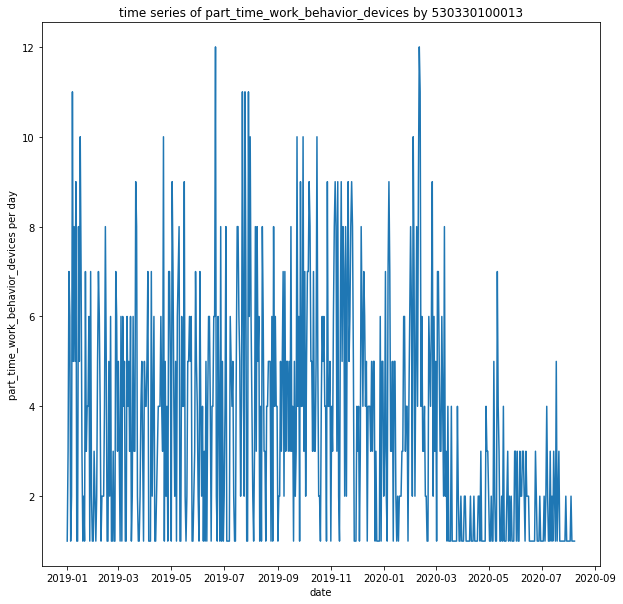

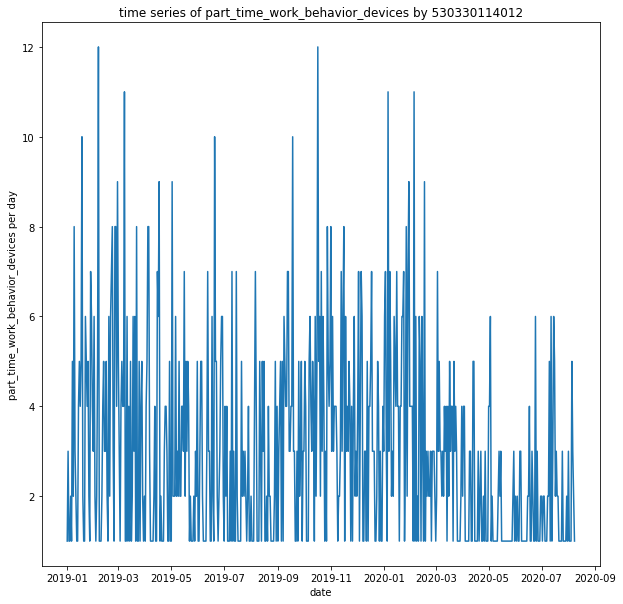

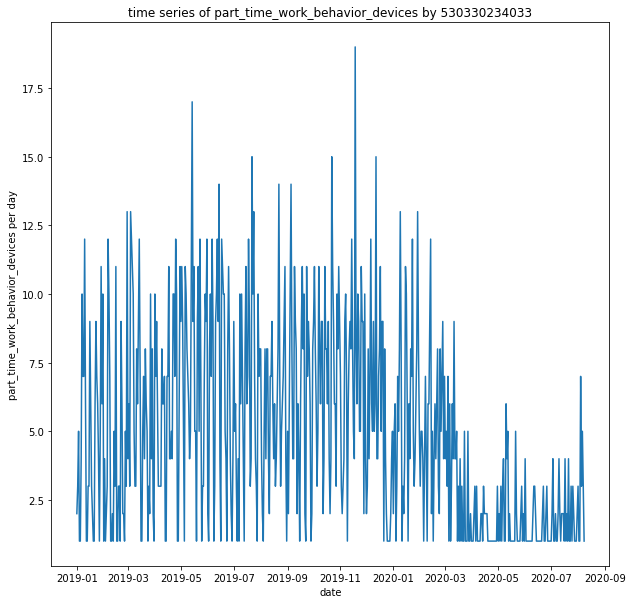

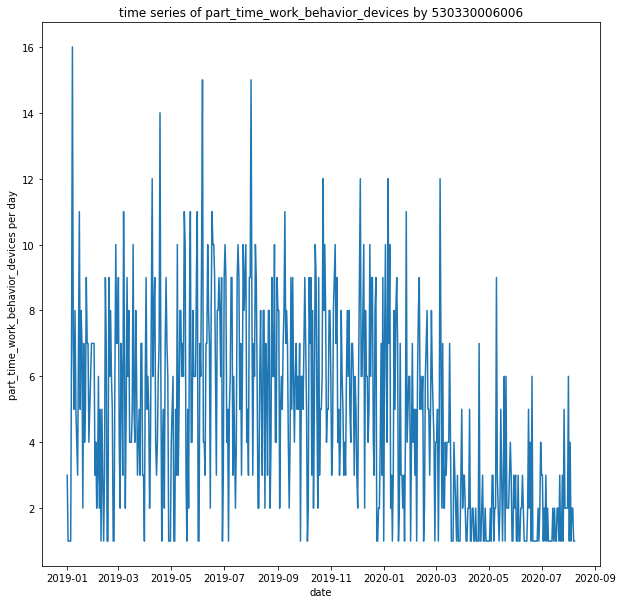

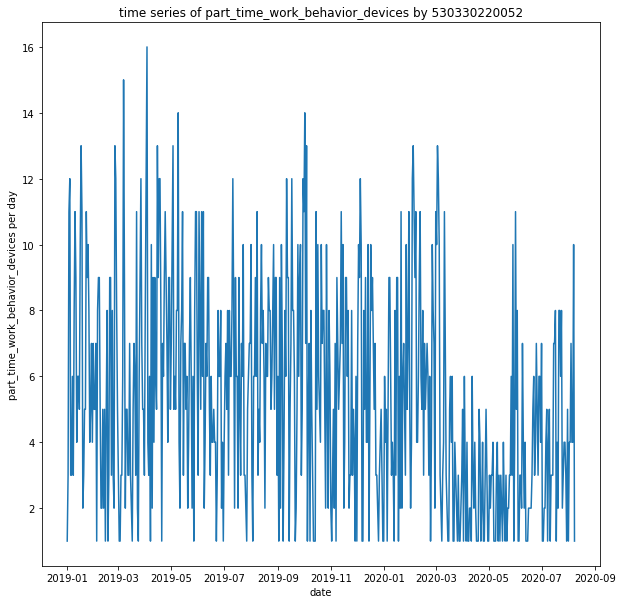

In [23]:
# plot time series of part_time behaviors for 10 census groups.
for i in range(10):
    plotTimeSeriesOfGroup(census_group_num_array[i], 'part_time_work_behavior_devices')

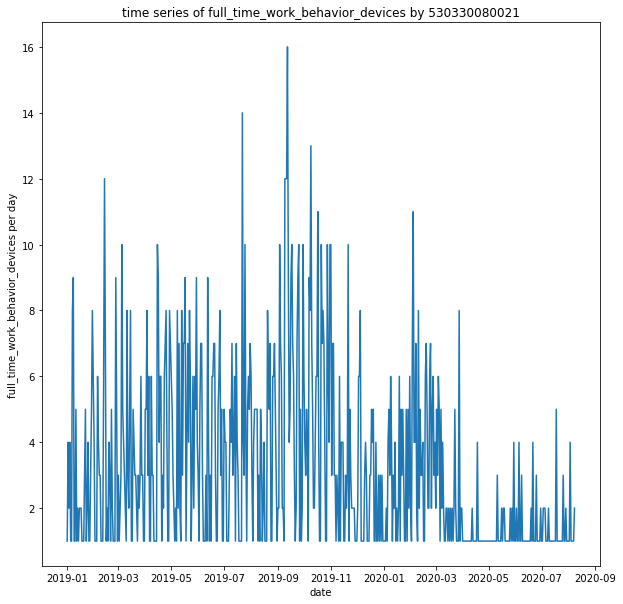

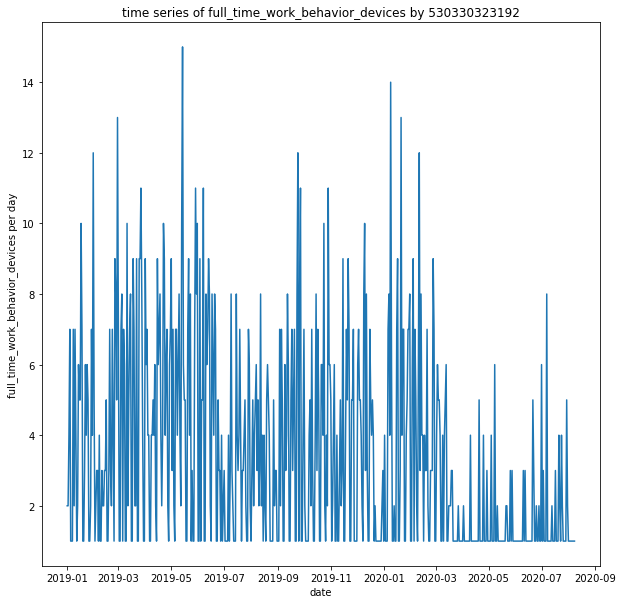

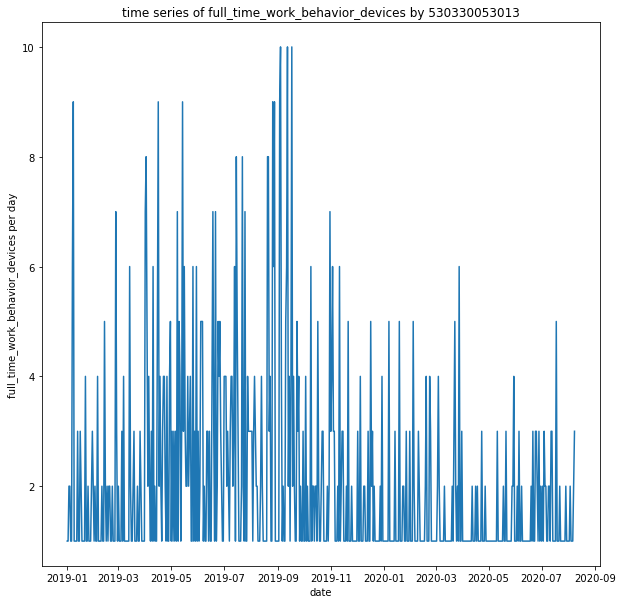

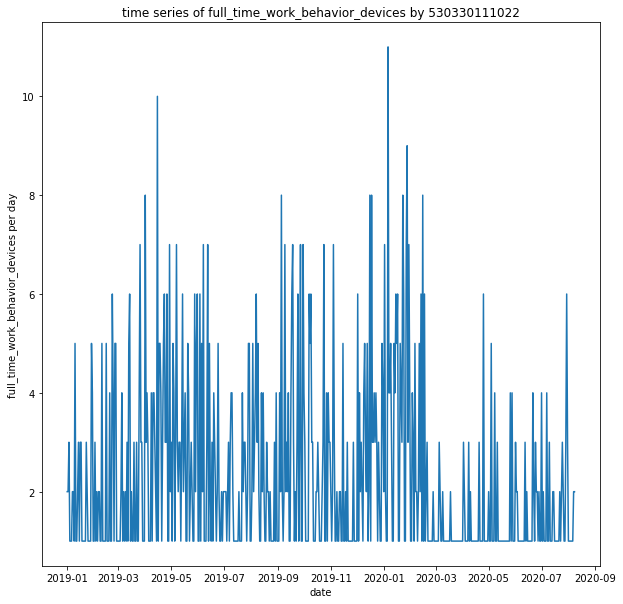

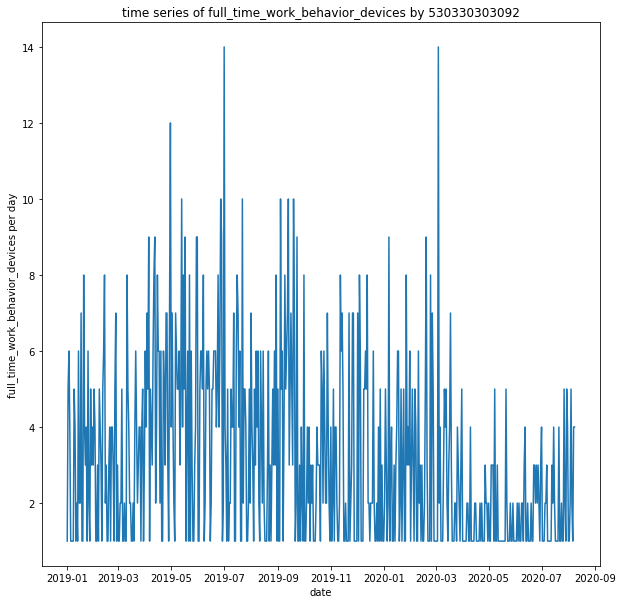

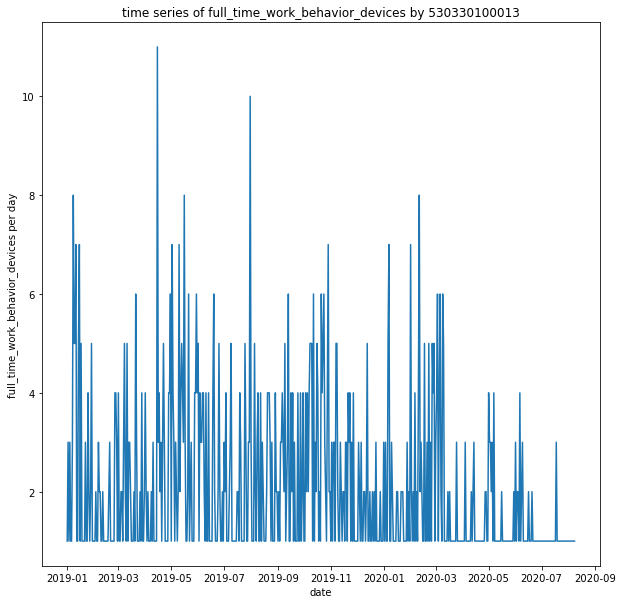

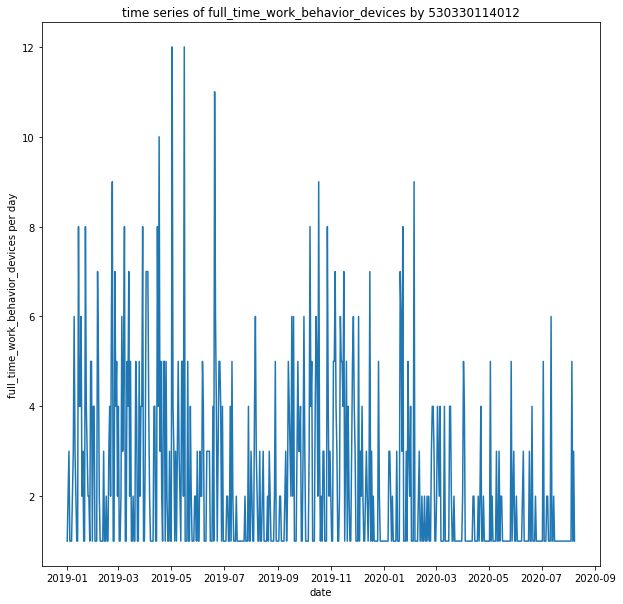

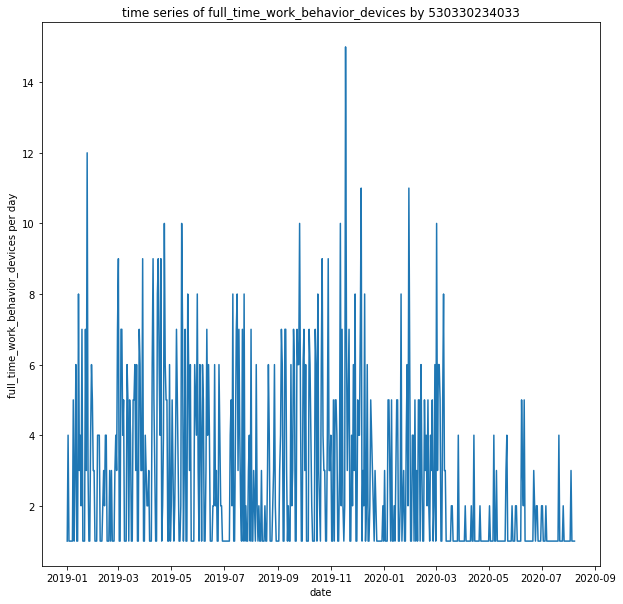

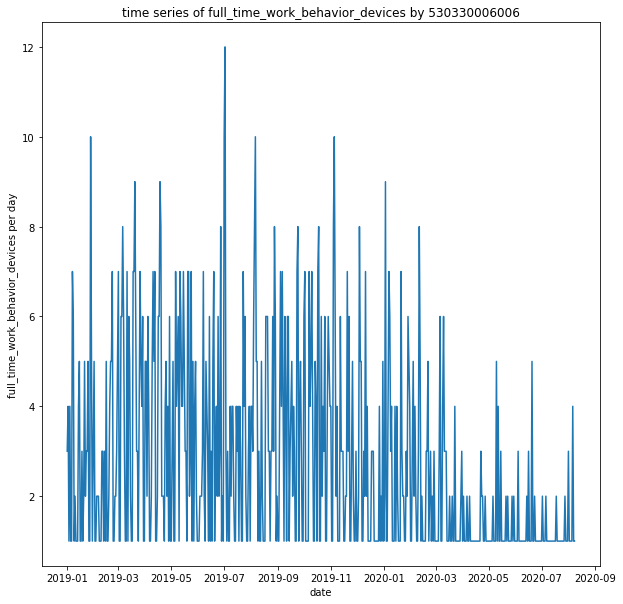

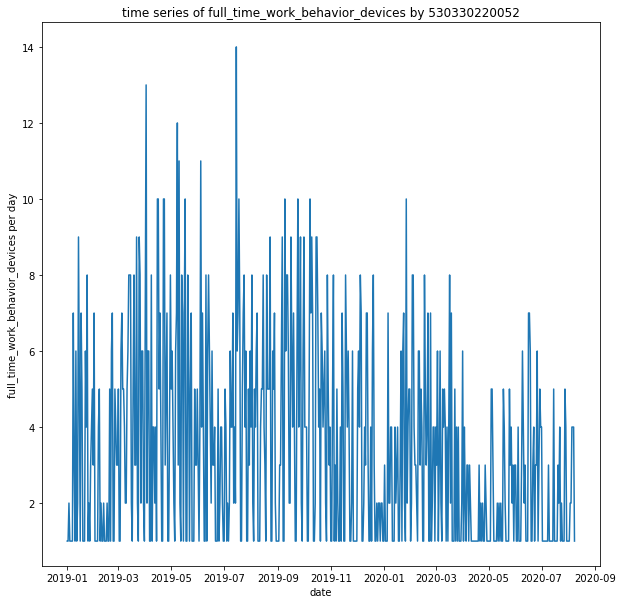

In [24]:
# plot time series of full_time_work behaviors for 10 census groups.
for i in range(10):
    plotTimeSeriesOfGroup(census_group_num_array[i], 'full_time_work_behavior_devices')

As we can see, there are no obvious outliers in part_time_work_devices and full_time_work_devices either.

# Conclusion:
We can do PSM with median_home_dwell_time, part_time and full_time behaviors, since they don't have many outliers.